## Context:

The dataset contains information related to Engineering students across different colleges and their salary. The goal of this project is to train some regression models that accurately predict the salary of students, analyze their results, assess their benefits and risks according to a business use case of your choice. The metric used to assess model performance is RMSE (root mean squared error).

## 0. Import Packages:

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## 1. Import Dataset:

In [2]:
file_url_train = "https://raw.githubusercontent.com/RatanaSovann/Linear_reg_project/main/salary_training.csv"
file_url_valid = "https://raw.githubusercontent.com/RatanaSovann/Linear_reg_project/main/salary_validation.csv"
file_url_test = "https://raw.githubusercontent.com/RatanaSovann/Linear_reg_project/main/salary_test.csv"

In [3]:
df_train = pd.read_csv(file_url_train)
df_valid = pd.read_csv(file_url_valid)
df_test = pd.read_csv(file_url_test)

df = pd.concat([df_train,df_valid,df_test])

In [4]:
# Count the number of duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 1198


In [5]:
df = df.drop_duplicates()

## 2. Explore Dataset

In [6]:
df

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,electronics & telecommunications,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,biotechnology,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,2005,73.00,1263,2,B.Tech/B.E.,electronics and communication engineering,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,2008,77.00,9481,2,B.Tech/B.E.,information technology,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,2006,65.56,547,2,B.Tech/B.E.,information technology,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,2006,65.16,1629,2,B.Tech/B.E.,computer engineering,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


There are a lot of missing score for student who may have not taken the same subject

In [7]:
# Replace -1 with 0
df.replace(-1, 0, inplace=True)

In [8]:
df.columns

Index(['id', 'gender', 'dob', '10percentage', '12graduation', '12percentage',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'salary'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2998.0,664892.583389,364895.076716,11244.0000,333464.750000,639694.500000,995177.000000,1.297877e+06
10percentage,2998.0,77.666264,10.002785,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.0000,2007.000000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.341061,11.120299,40.0000,66.000000,74.000000,82.600000,9.870000e+01
collegeid,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
collegetier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegegpa,2998.0,71.509857,8.122462,6.6300,66.530000,71.800000,76.300000,9.993000e+01
collegecityid,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
collegecitytier,2998.0,0.296197,0.456655,0.0000,0.000000,0.000000,1.000000,1.000000e+00
graduationyear,2998.0,2011.939960,36.780582,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03



By observing the mean and the median (50%) of the dataset above we can see that
*   Personality attribute such as conscientiousness, agreeableness, extraversion and neurotism are right skewed with some outliers
*   Salary is also right skewed indicating some outliers



Max salary also indicates some unrealistic salary ($4,000,000) which is highly likely an outlier/mistake

## Exploratory Data Analysis:

In [10]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

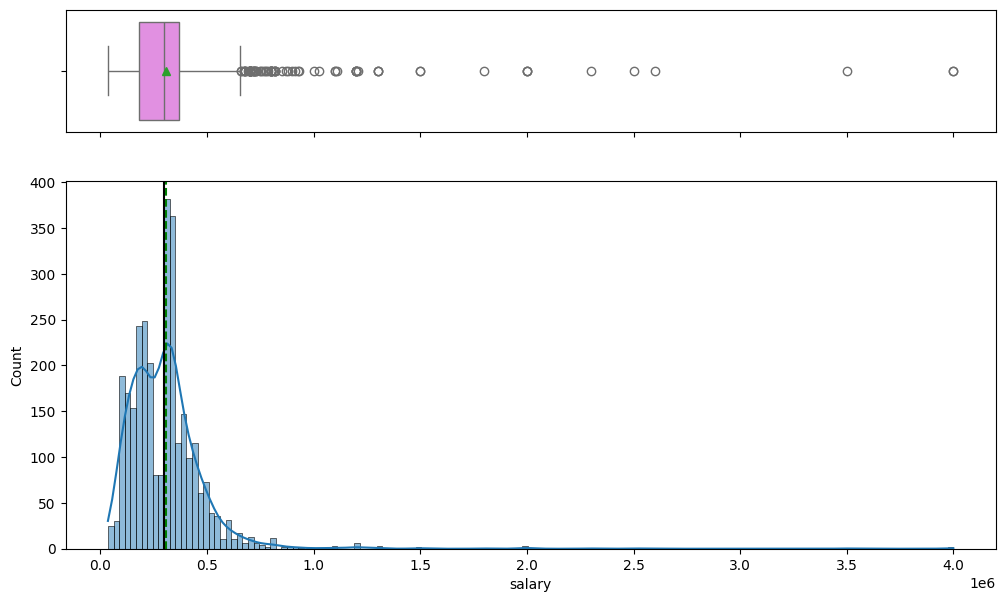

In [11]:
histogram_boxplot(df, 'salary', kde=True)



*   Salary is right skewed with several abnormal outliers.




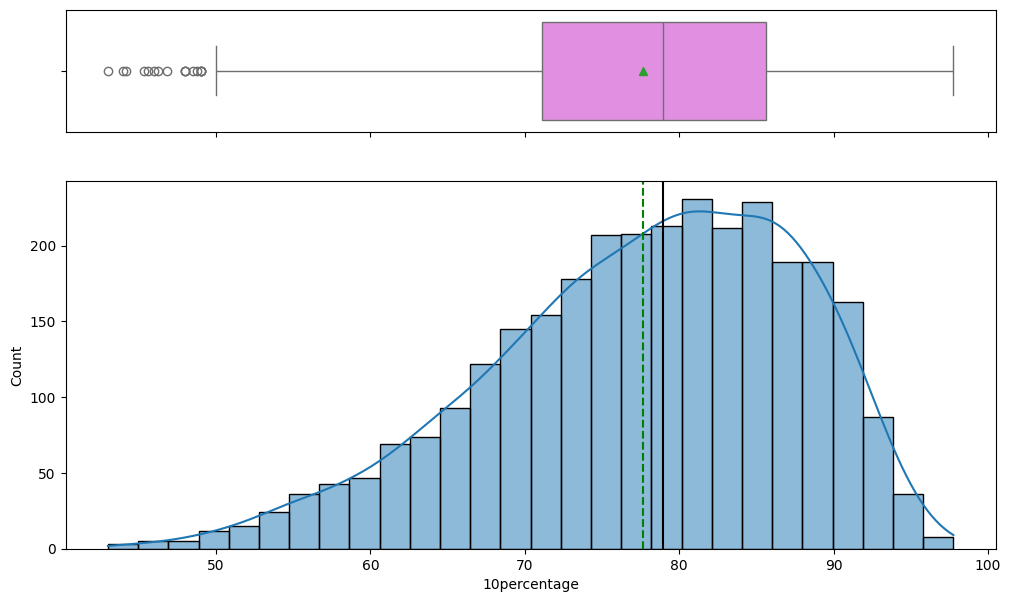

In [76]:
histogram_boxplot(df, '10percentage', kde=True)

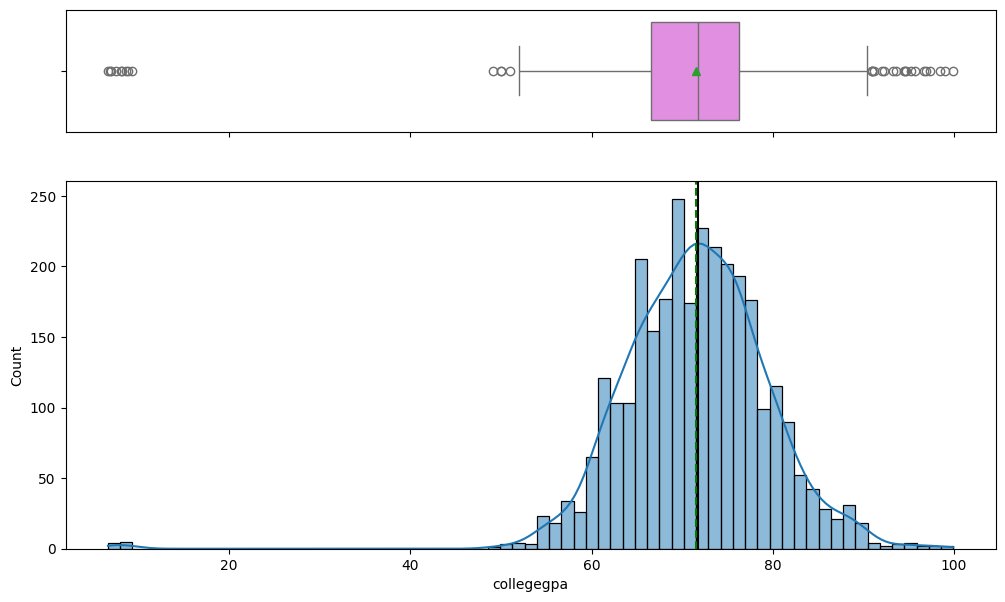

In [12]:
histogram_boxplot(df, 'collegegpa', kde=True)



*   College GPA is left skewd with serveral outliers on the lower end.





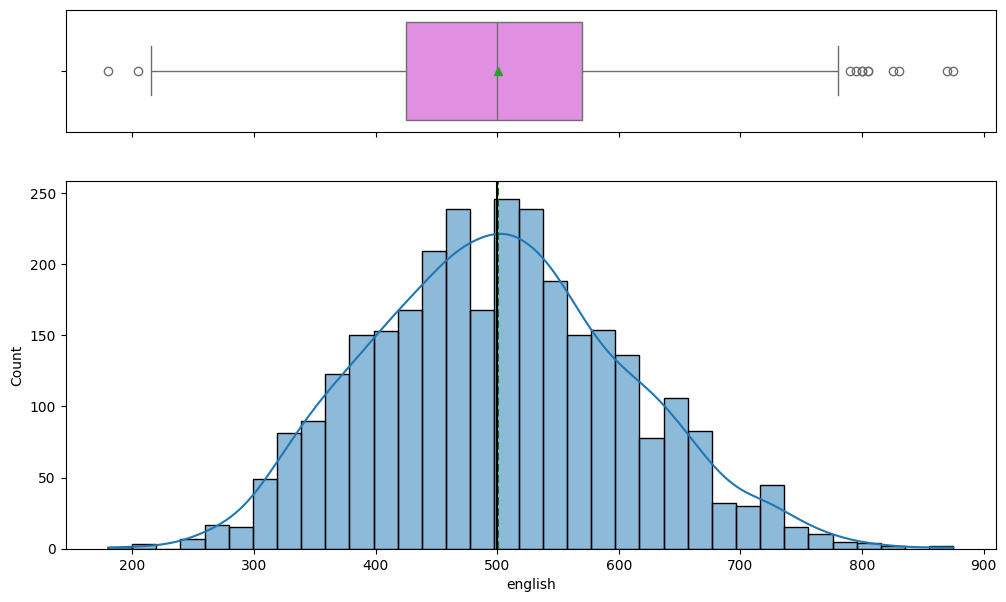

In [13]:
histogram_boxplot(df, 'english', kde=True)

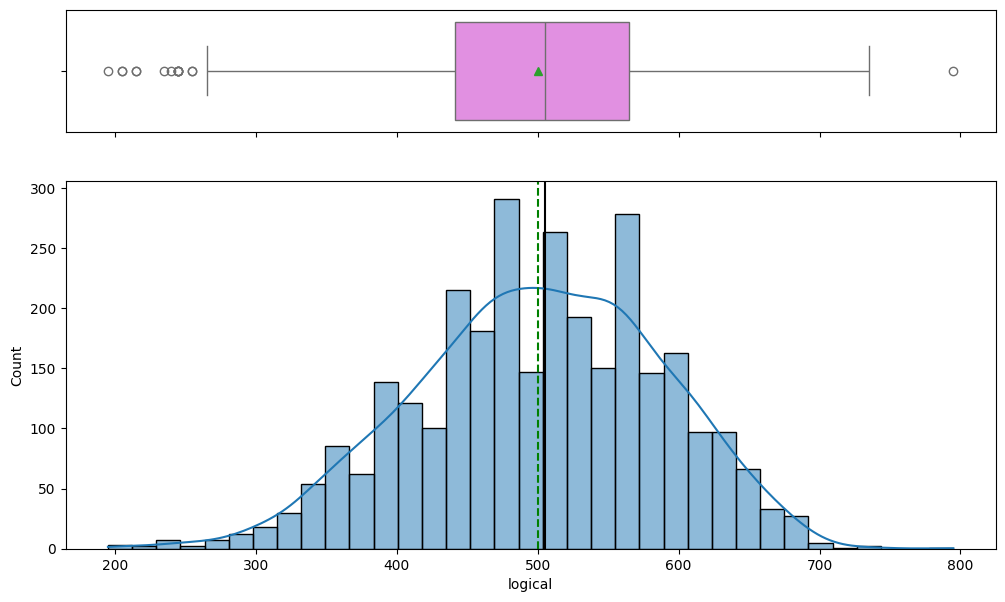

In [14]:
histogram_boxplot(df, 'logical', kde=True)

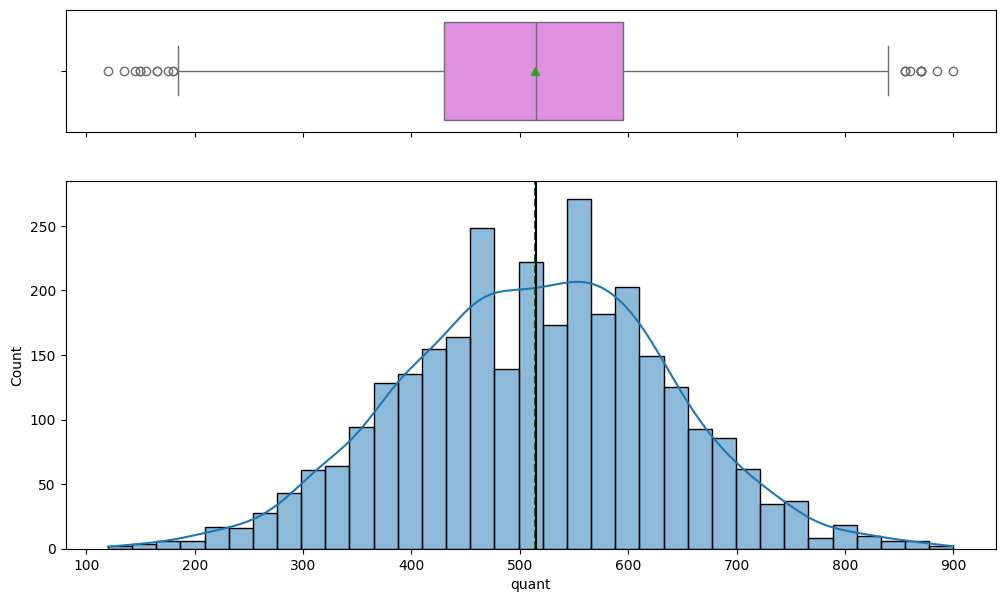

In [15]:
histogram_boxplot(df, 'quant', kde=True)



*   Quantitaive, Logical and English score are normally distributed with both negative and positive outliers.




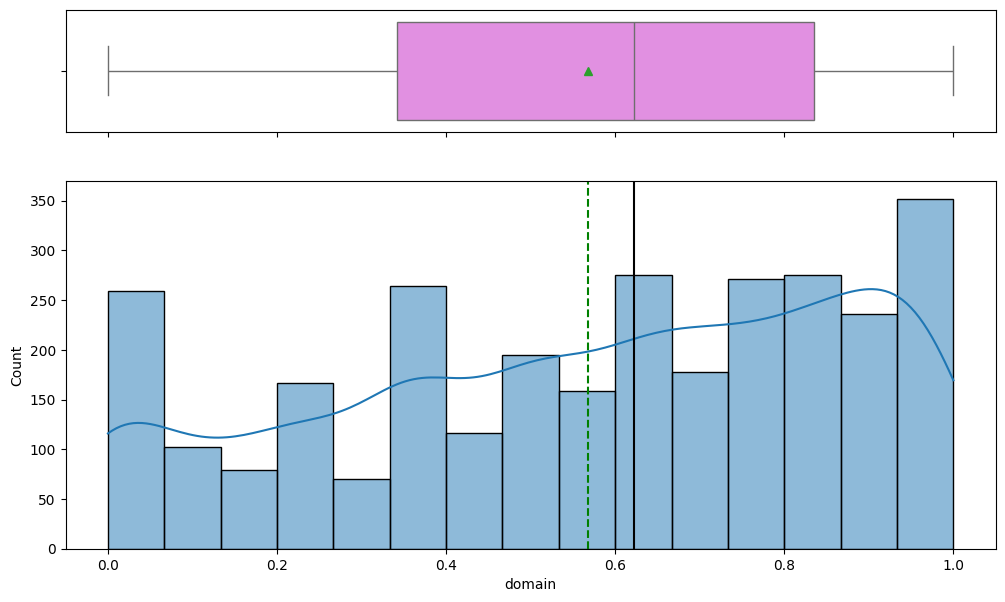

In [16]:
histogram_boxplot(df, 'domain', kde=True)

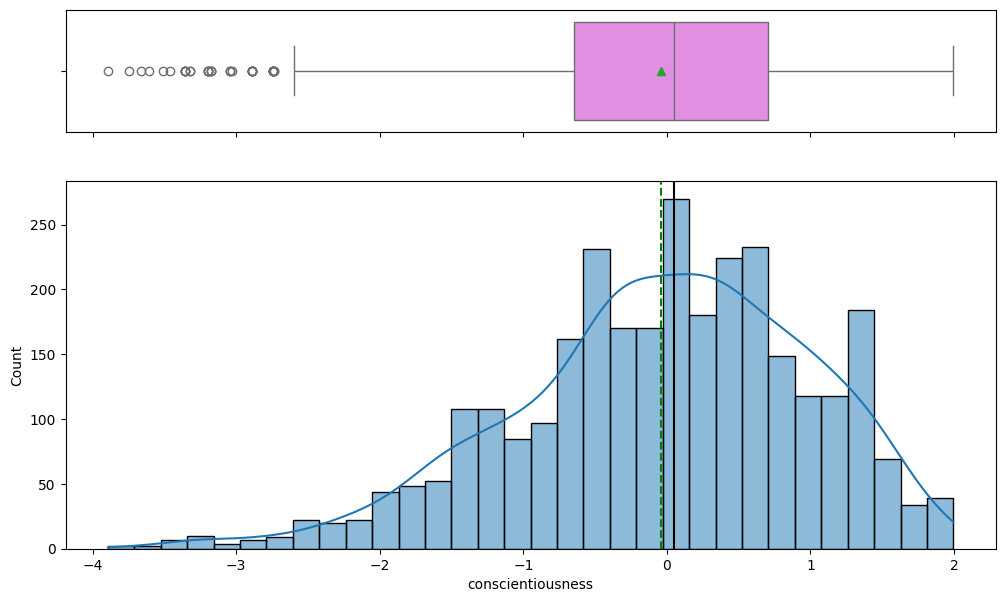

In [17]:
histogram_boxplot(df, 'conscientiousness', kde=True)

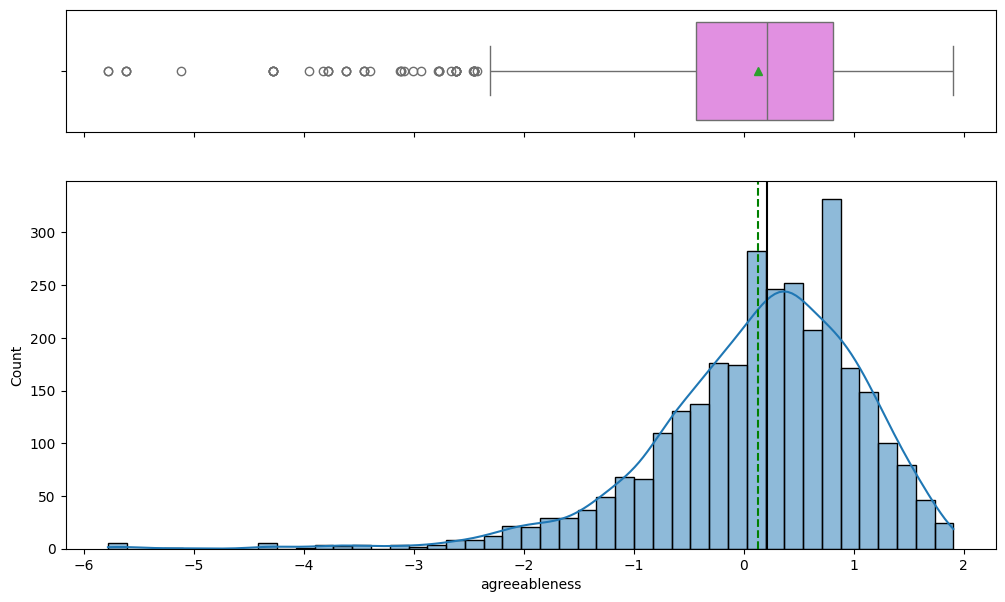

In [18]:
histogram_boxplot(df, 'agreeableness', kde=True)

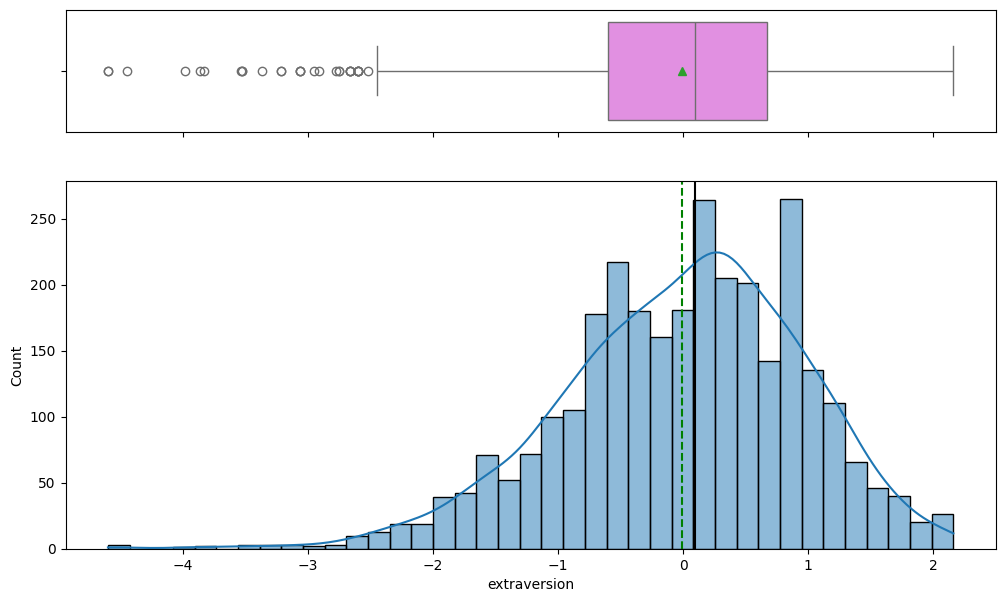

In [19]:
histogram_boxplot(df, 'extraversion', kde=True)

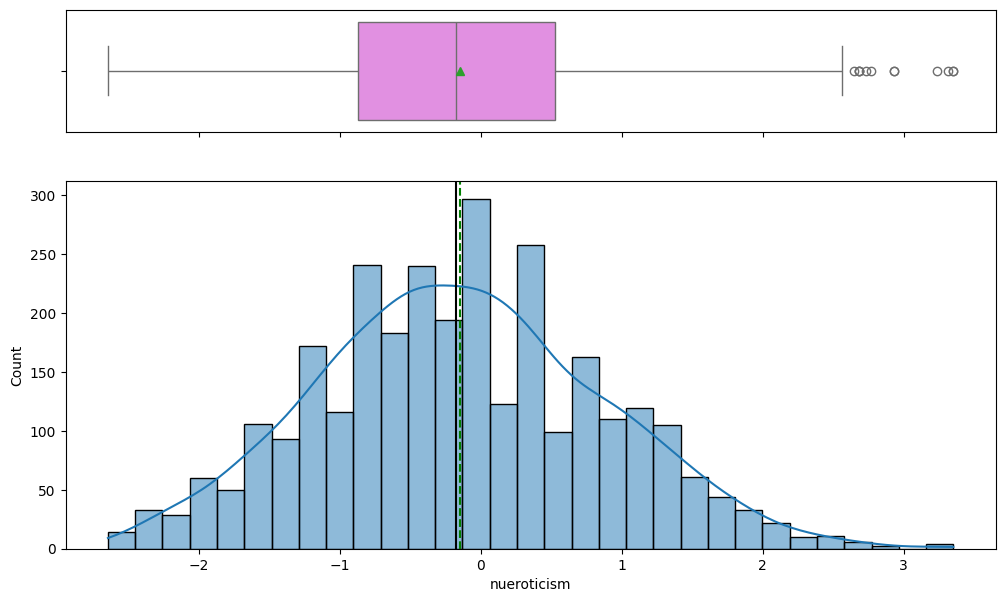

In [20]:
histogram_boxplot(df, 'nueroticism', kde=True)



*   Most of the personality traits score exhibit left skewness except nueroticism which is rightly skewed.



Understanding the distribution of the dataset is important as it degrades the model’s ability (especially regression-based models) to describe typical cases as it has to deal with rare cases on extreme values.

Tree-based model such as Random Forest generally handle skewed data very well due to its non-parametric nature. However, there are still some considerations:

1. **Feature Importance:** Skewed distributions can affect the calculation of feature importance. Features with extreme skewness might dominate splits, leading to less informative splits.
Model Interpretability:

2. Trees can overemphasize particular ranges of the data, leading to less intuitive models. Interpretability can be impacted if the skewness isn't addressed.

3. **Performance:** If the skewed feature is very important, the model might become biased towards the majority of the data, potentially impacting performance on the minority data (the tail).




In [21]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-21-98df481f0862>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


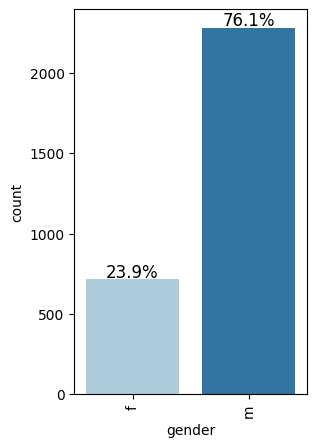

In [22]:
labeled_barplot(df, 'gender', perc=True)

The majority of data is male

<ipython-input-21-98df481f0862>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


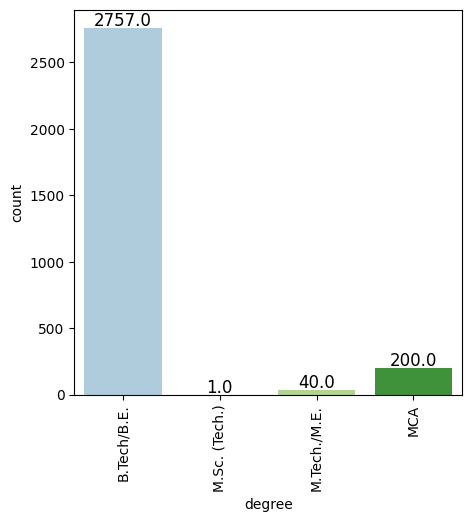

In [23]:
labeled_barplot(df, 'degree')

<ipython-input-21-98df481f0862>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


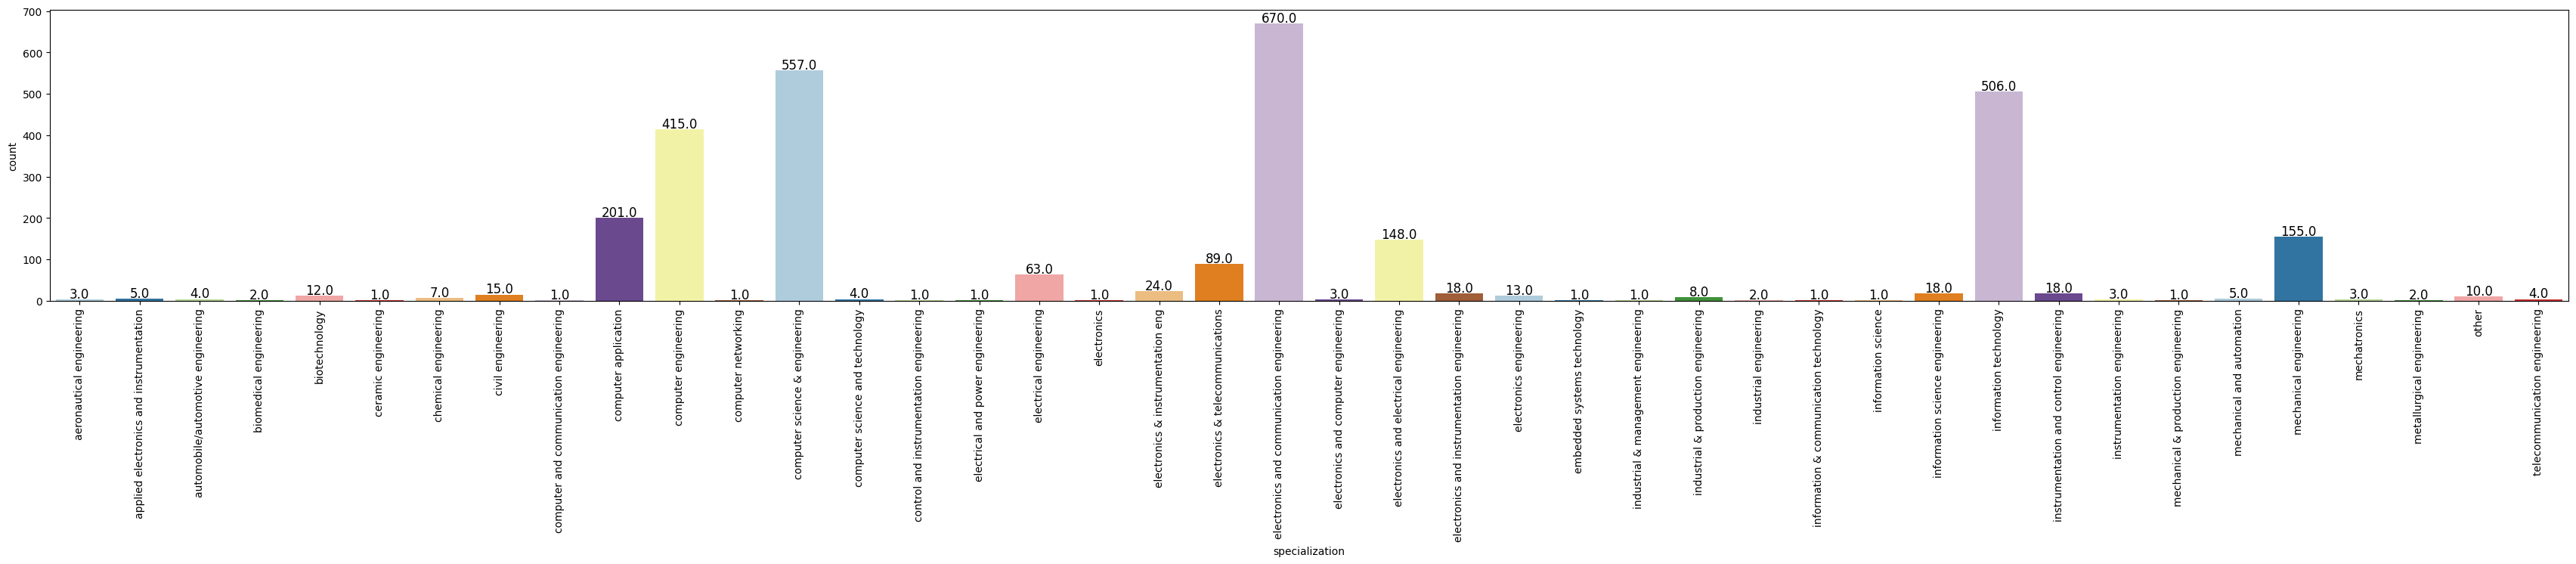

In [24]:
labeled_barplot(df, 'specialization')

The top four specialization are:


1.   Dlectronics and communication engineering
2.   Computer science & engineering
3.Information technology
4. Computer Engineering



<ipython-input-21-98df481f0862>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


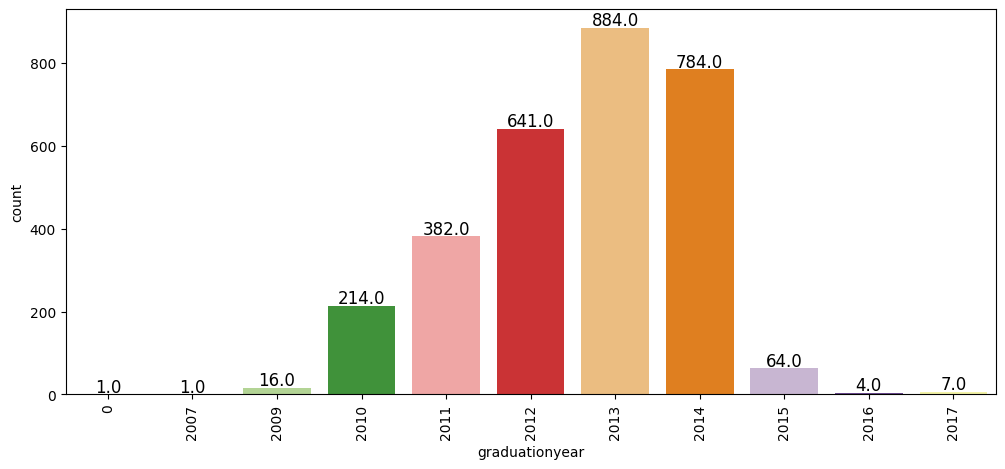

In [25]:
labeled_barplot(df, 'graduationyear')

There seem to be a missing data point. Most of the student graduate between 2011 - 2014.


In [26]:
df = df[df['graduationyear'] > 0]

### Bivariate analysis

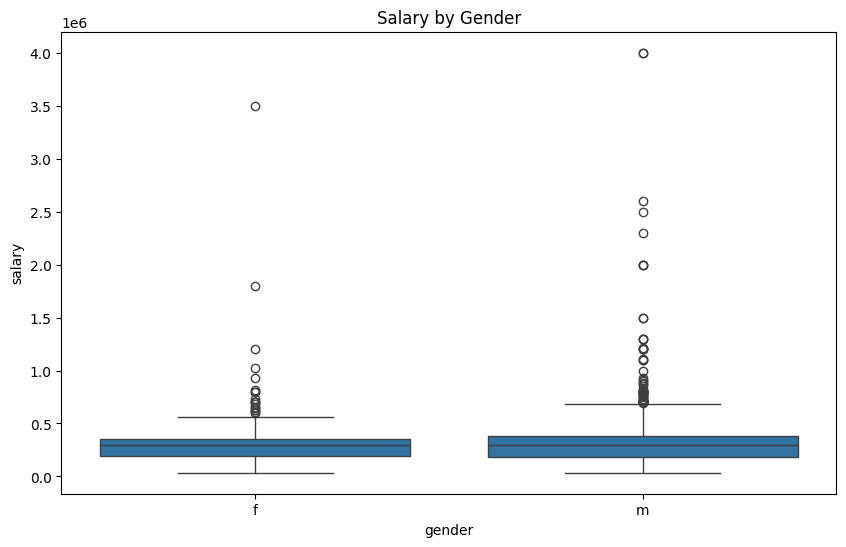

In [27]:
# Salary by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='salary', data=df)
plt.title('Salary by Gender')
plt.show()

The distribution of salary between males and females in this dataset is quite similar.

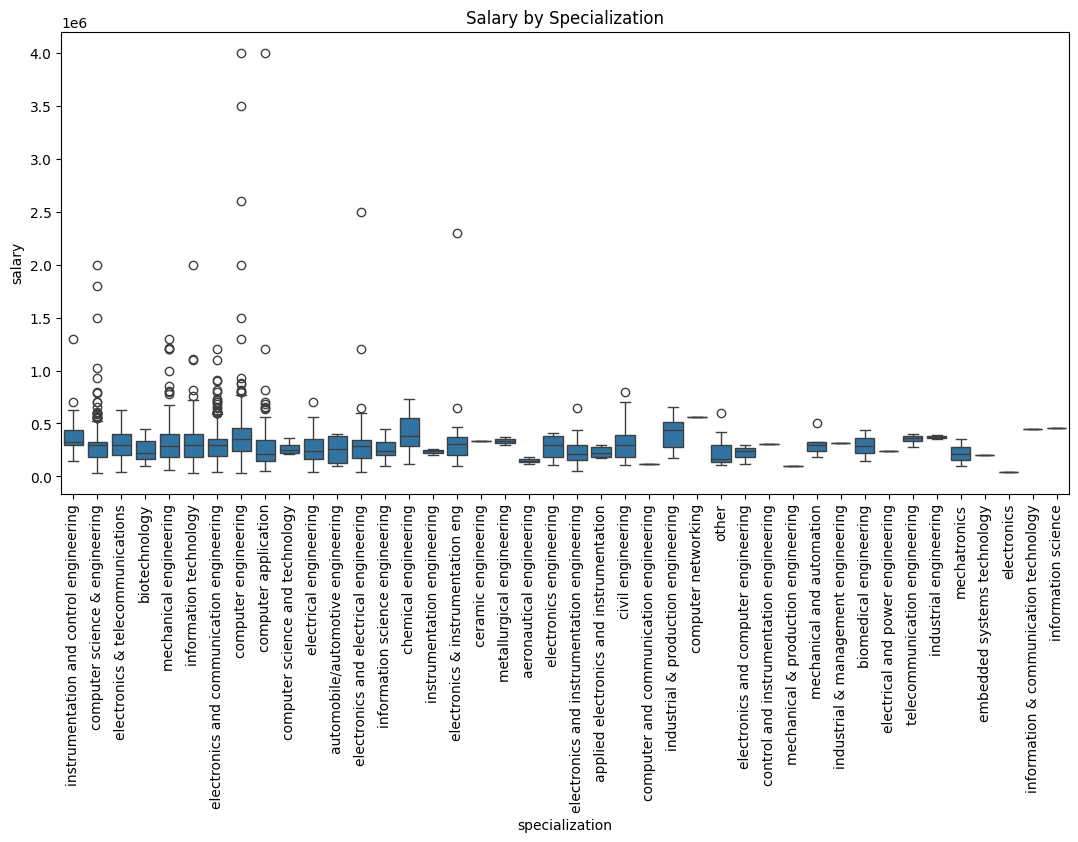

In [28]:
# Salary by specialization
plt.figure(figsize=(13, 6))
sns.boxplot(x='specialization', y='salary', data=df)
plt.title('Salary by Specialization')
plt.xticks(rotation=90)
plt.show()

Computer engineering stands out as having high salary outliers.

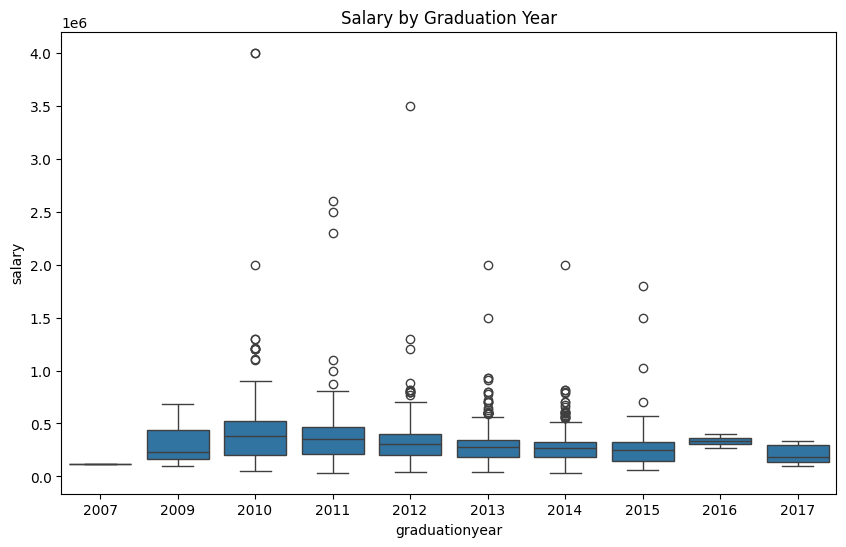

In [29]:
# Salary by graduation year
plt.figure(figsize=(10, 6))
sns.boxplot(x='graduationyear', y='salary', data=df)
plt.title('Salary by Graduation Year')
plt.show()

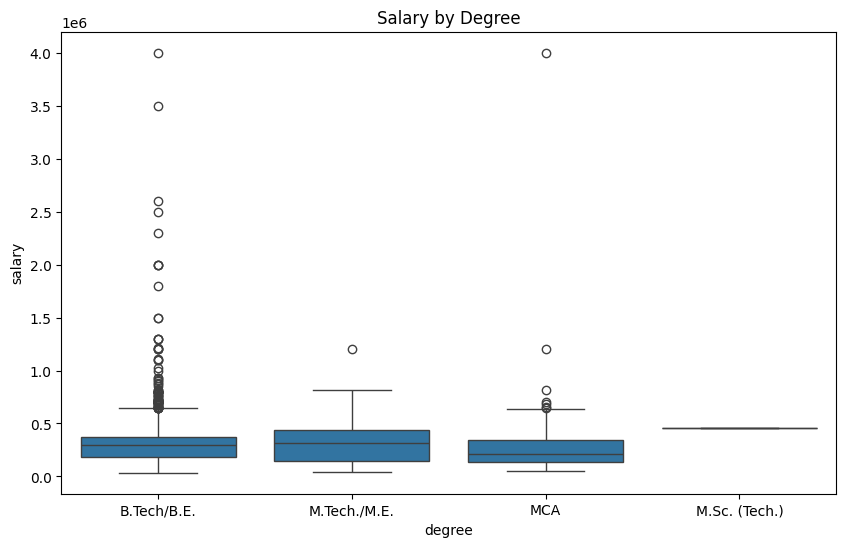

In [30]:
# Salary by degree
plt.figure(figsize=(10, 6))
sns.boxplot(x='degree', y='salary', data=df)
plt.title('Salary by Degree')
plt.show()

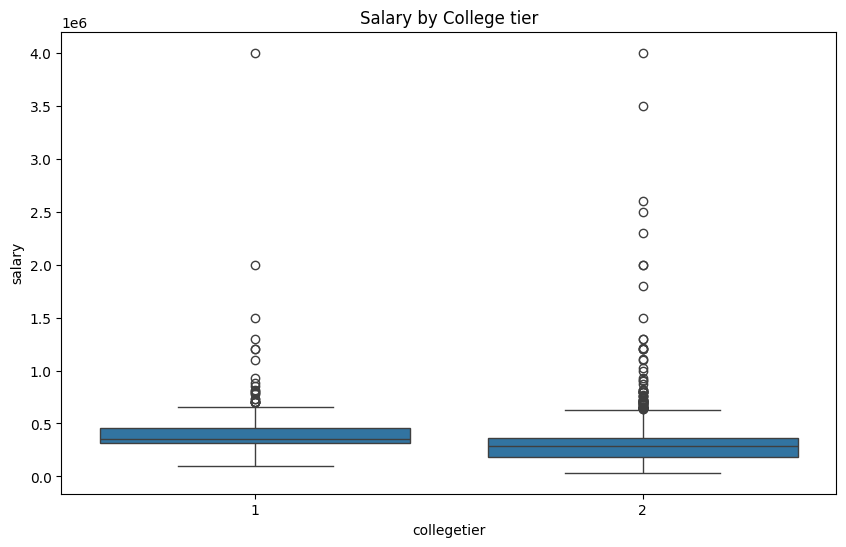

In [31]:
# Salary by college tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='collegetier', y='salary', data=df)
plt.title('Salary by College tier')
plt.show()

There are no large salary variances among the graduation years in which the data is concentrated. Outliers are exhibited through out the years as well. This indicate that graduation year may not be useful in predicting salary

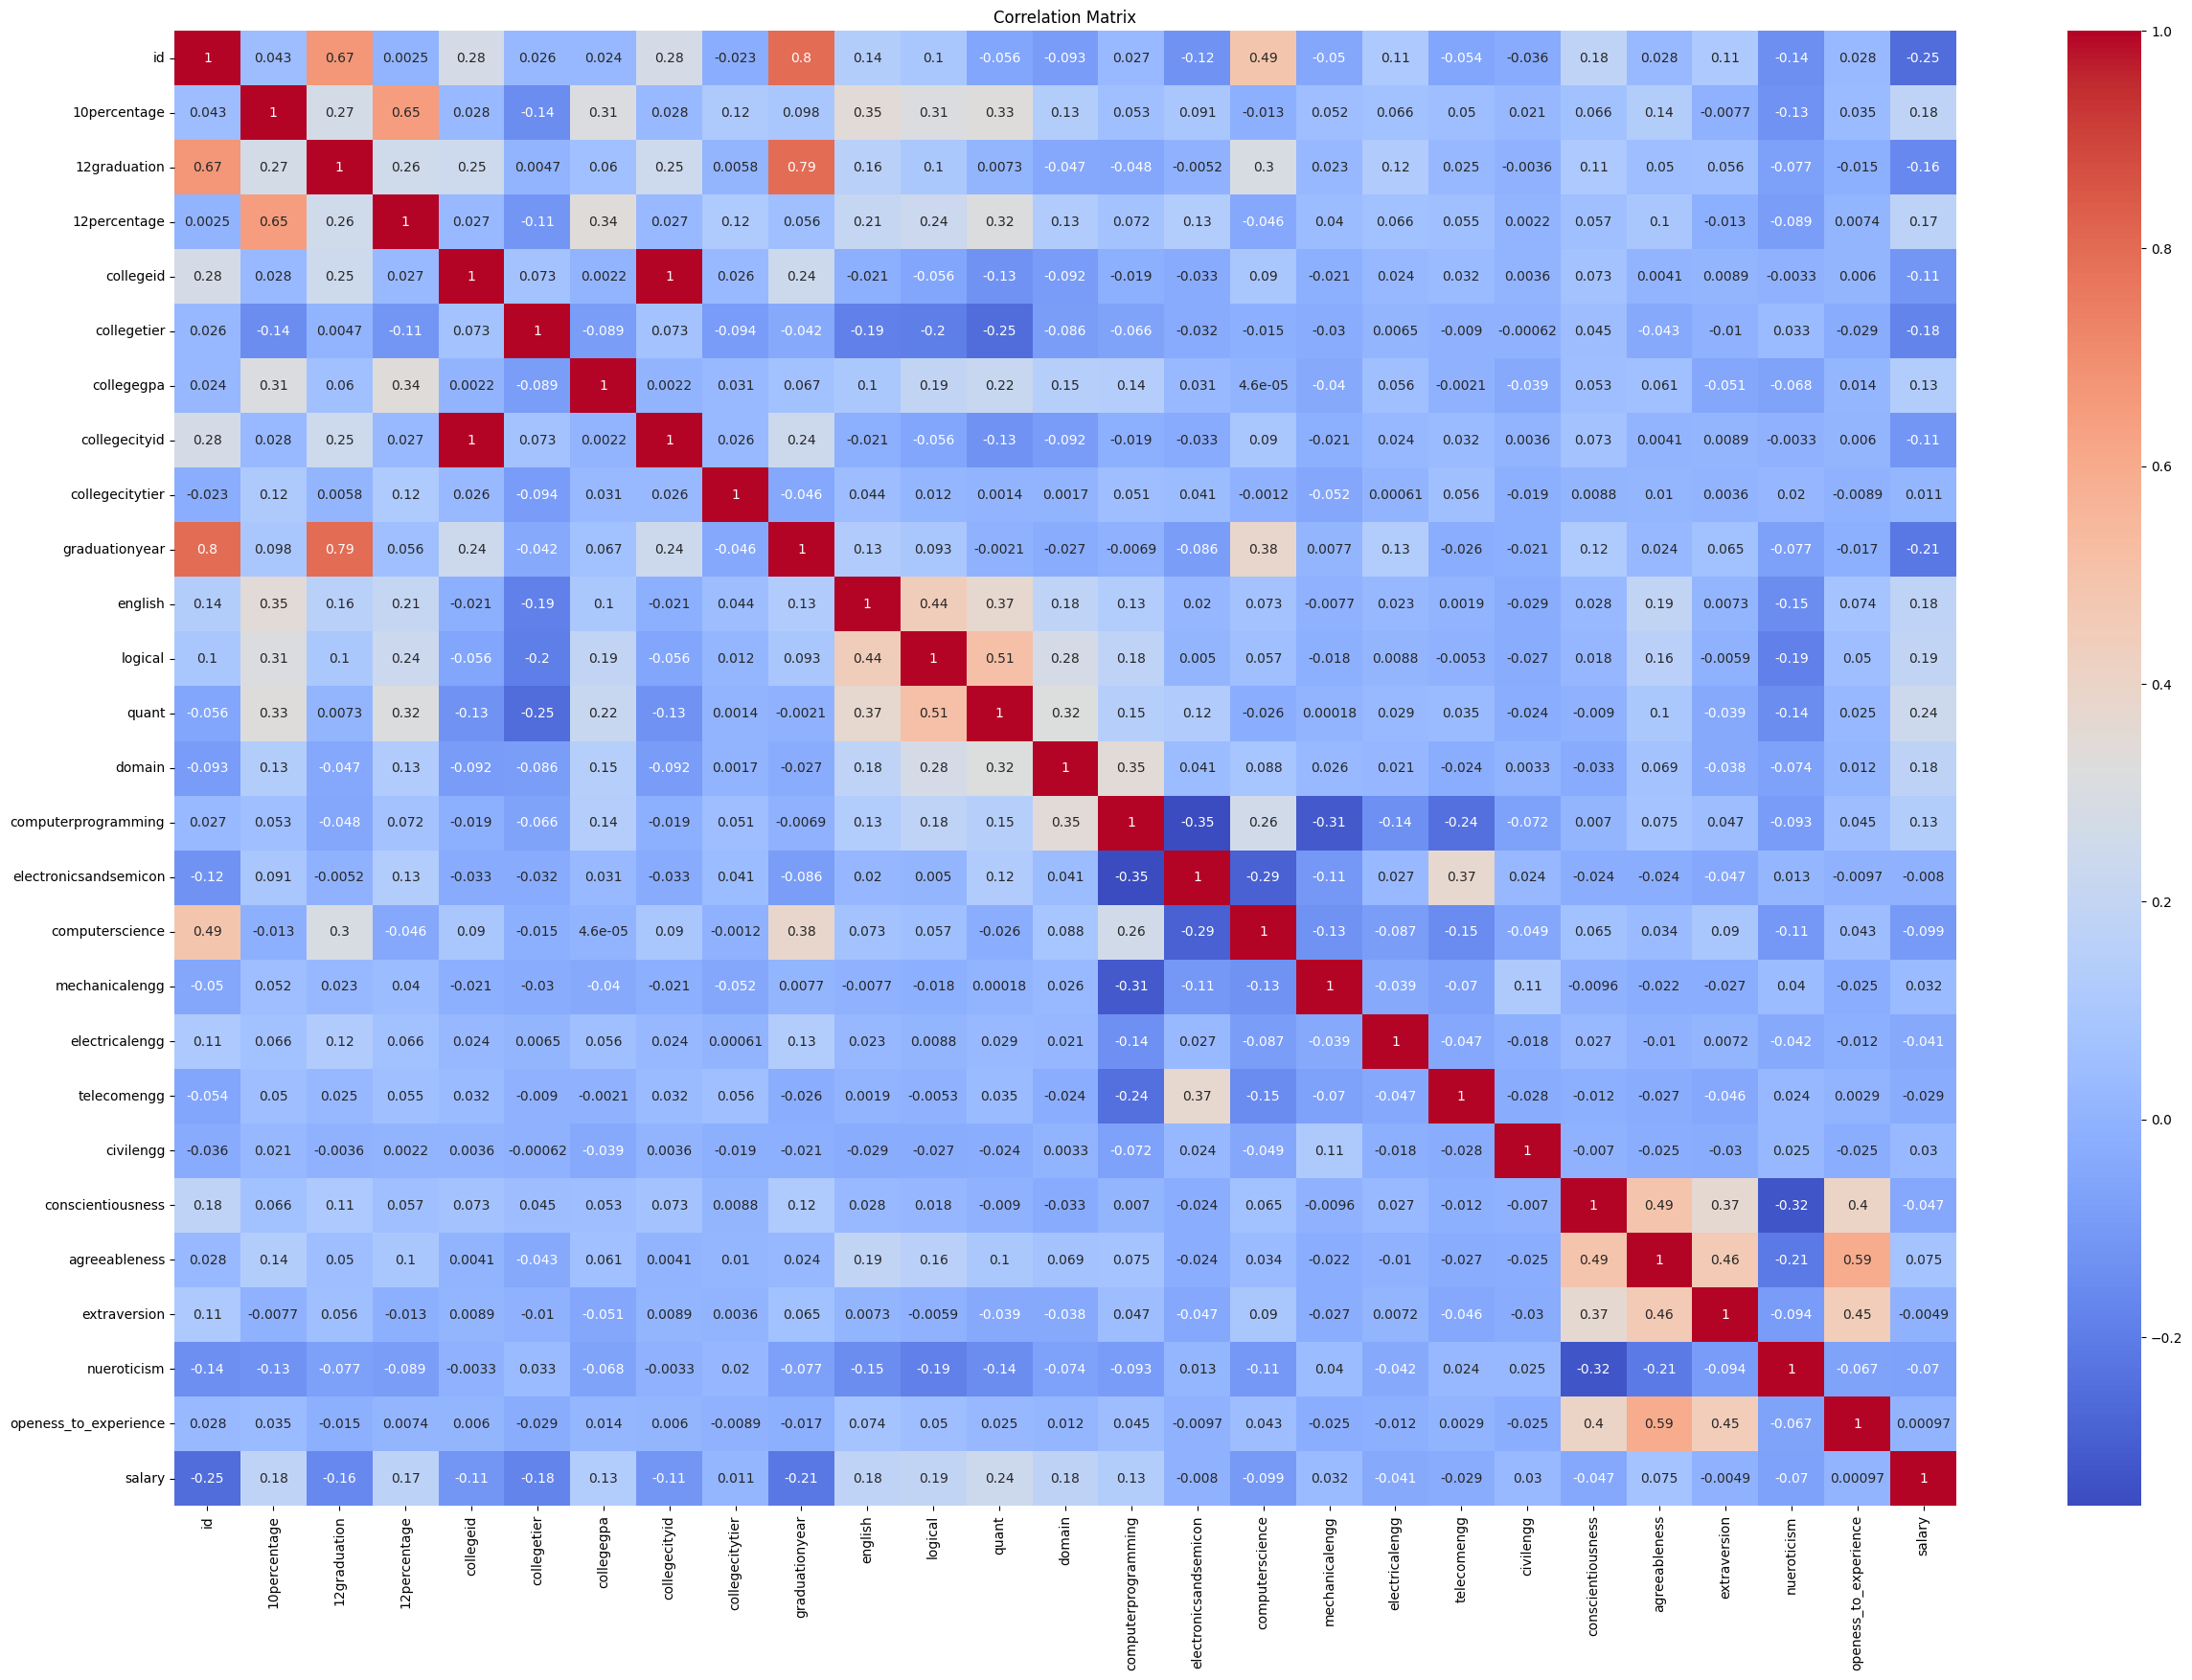

In [32]:
# Correlation Matrix

num_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 20))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Explore Variable of Interest

In [33]:
var_interest = ['specialization','10percentage', '12percentage', 'collegegpa','english','logical', 'quant', 'domain','conscientiousness',
                   'agreeableness','extraversion', 'nueroticism', 'openess_to_experience']

var_interest_categorical = ['specialization']

var_interest_num =['10percentage', '12percentage', 'collegegpa','english','logical', 'quant', 'domain','conscientiousness',
                   'agreeableness','extraversion', 'nueroticism', 'openess_to_experience']

In [34]:
df[var_interest_categorical].describe()

,specialization
count,2997
unique,42
top,electronics and communication engineering
freq,670


In [35]:
df['specialization'].value_counts()

specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         154
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

Specialization less than 50 count will be grouped into 'other' to ensure same dimensions for train/validation/test split

In [36]:
df[var_interest_num].describe()

,10percentage,12percentage,collegegpa,english,logical,quant,domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,77.662482,74.337437,71.510774,501.001668,500.380047,514.082416,0.568102,-0.039105,0.126133,-0.008566,-0.145893,-0.140743
std,10.002310,11.120385,8.123662,105.262453,87.268726,122.177762,0.301171,1.024921,0.955979,0.962841,1.013063,1.007100
min,43.000000,40.000000,6.630000,180.000000,195.000000,120.000000,0.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700
25%,71.130000,66.000000,66.520000,425.000000,440.000000,430.000000,0.342315,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200
50%,78.930000,74.000000,71.800000,500.000000,505.000000,515.000000,0.622643,0.046400,0.212400,0.091400,-0.172700,-0.094300
75%,85.600000,82.600000,76.300000,570.000000,565.000000,595.000000,0.837621,0.702700,0.812800,0.672000,0.526200,0.502400
max,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,1.995300,1.904800,2.161700,3.352500,1.630200


## 4. Prepare Data

In [79]:
df_cleaned = df.copy()

In [80]:
# Filter specialization with count < 50 to other
counts = df_cleaned['specialization'].value_counts()
other_specialization = counts[counts < 50].index.tolist()
df_cleaned.loc[df_cleaned['specialization'].isin(other_specialization), 'specialization'] = 'other'

In [81]:
df_cleaned['specialization'].value_counts()

specialization
electronics and communication engineering    670
computer science & engineering               557
information technology                       506
computer engineering                         415
computer application                         201
other                                        194
mechanical engineering                       154
electronics and electrical engineering       148
electronics & telecommunications              89
electrical engineering                        63
Name: count, dtype: int64

In [82]:
# Remove outliers with salaries over 500000
df_cleaned = df_cleaned[df_cleaned['salary'] < 400000]

In [83]:
df_cleaned['salary'].describe()

count      2338.000000
mean     236977.758768
std       88466.493258
min       35000.000000
25%      175000.000000
50%      240000.000000
75%      320000.000000
max      395000.000000
Name: salary, dtype: float64

In [84]:
# Select the variable of interest
x = df_cleaned[var_interest]
# Select the variable of interest
y = df_cleaned.pop('salary')

In [85]:
x

,specialization,10percentage,12percentage,collegegpa,english,logical,quant,domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1,computer science & engineering,57.00,64.50,65.00,440,435,210,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859
2,electronics & telecommunications,77.33,85.17,61.94,485,475,505,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875
4,other,82.00,75.00,64.30,575,495,365,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864
6,mechanical engineering,72.50,53.20,68.00,510,495,405,0.829585,0.1282,-0.4536,0.3174,0.90660,-0.0943
7,computer science & engineering,77.00,88.00,71.00,370,470,280,0.704090,0.1282,0.5454,0.4711,0.90660,-0.2859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,computer science & engineering,81.10,86.70,70.51,500,350,320,0.635979,1.5644,0.8784,0.7785,-1.50210,0.6721
2993,electronics and communication engineering,75.00,73.00,70.00,505,485,445,0.538387,-1.1901,0.9688,-1.0697,1.35490,0.0284
2994,information technology,84.00,77.00,75.20,345,585,395,0.190153,-0.1082,0.0328,-0.4891,-0.29020,0.5024
2995,information technology,91.40,65.56,73.19,385,425,485,0.600057,-0.8810,0.1888,-0.3440,0.06230,0.6603


In [86]:
y

1       110000
2       255000
4       200000
6       150000
7       105000
         ...  
2989    300000
2993    120000
2994    120000
2995    385000
2997    200000
Name: salary, Length: 2338, dtype: int64

In [87]:
# Convert specialization to binary
specialization_dummy = pd.get_dummies(x['specialization'], dtype=int)
specialization_dummy.drop(columns='other', inplace=True)  # Drop 'other' column to prevent dummy variable trap
x = pd.concat([x, specialization_dummy], axis=1)
x.drop(columns='specialization', inplace=True)


In [88]:
x

,10percentage,12percentage,collegegpa,english,logical,quant,domain,conscientiousness,agreeableness,extraversion,...,openess_to_experience,computer application,computer engineering,computer science & engineering,electrical engineering,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,information technology,mechanical engineering
1,57.00,64.50,65.00,440,435,210,0.342315,1.1336,0.0459,1.2396,...,-0.2859,0,0,1,0,0,0,0,0,0
2,77.33,85.17,61.94,485,475,505,0.824666,0.5100,-0.1232,1.5428,...,-0.2875,0,0,0,0,1,0,0,0,0
4,82.00,75.00,64.30,575,495,365,0.278457,-1.4992,-0.7473,-1.0697,...,0.1864,0,0,0,0,0,0,0,0,0
6,72.50,53.20,68.00,510,495,405,0.829585,0.1282,-0.4536,0.3174,...,-0.0943,0,0,0,0,0,0,0,0,1
7,77.00,88.00,71.00,370,470,280,0.704090,0.1282,0.5454,0.4711,...,-0.2859,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,81.10,86.70,70.51,500,350,320,0.635979,1.5644,0.8784,0.7785,...,0.6721,0,0,1,0,0,0,0,0,0
2993,75.00,73.00,70.00,505,485,445,0.538387,-1.1901,0.9688,-1.0697,...,0.0284,0,0,0,0,0,1,0,0,0
2994,84.00,77.00,75.20,345,585,395,0.190153,-0.1082,0.0328,-0.4891,...,0.5024,0,0,0,0,0,0,0,1,0
2995,91.40,65.56,73.19,385,425,485,0.600057,-0.8810,0.1888,-0.3440,...,0.6603,0,0,0,0,0,0,0,1,0


In [89]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2338 entries, 1 to 2997
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   10percentage                               2338 non-null   float64
 1   12percentage                               2338 non-null   float64
 2   collegegpa                                 2338 non-null   float64
 3   english                                    2338 non-null   int64  
 4   logical                                    2338 non-null   int64  
 5   quant                                      2338 non-null   int64  
 6   domain                                     2338 non-null   float64
 7   conscientiousness                          2338 non-null   float64
 8   agreeableness                              2338 non-null   float64
 9   extraversion                               2338 non-null   float64
 10  nueroticism                  

In [90]:
# Scaling the data to bring it to the same scale
sc = StandardScaler()

x[var_interest_num] = sc.fit_transform(x[var_interest_num])

After scalar transformation, the relationship between the attributes is still maintained. However the attributes are now all on the same scale, with an average of 0, standard deviation of 1

## 5. Data Splitting

In [91]:
# Split the data into 60% Train, 20% Validation and 20% Test

# First split: train and temp
X_train, temp_data = train_test_split(x, test_size=0.4, random_state=42)

# Second split: validation and test
X_val, X_test = train_test_split(temp_data, test_size=0.5, random_state=42)

# First split: train and temp2
y_train, temp2_data = train_test_split(y, test_size=0.4, random_state=42)

# Second split: validation and test
y_val, y_test = train_test_split(temp2_data, test_size=0.5, random_state=42)



In [92]:
# Print the sizes of the datasets
print(f'Train data size: {X_train.shape}')
print(f'Validation data size: {X_val.shape}')
print(f'Test data size: {X_test.shape}')

Train data size: (1402, 21)
Validation data size: (468, 21)
Test data size: (468, 21)


In [93]:
# Print the sizes of the datasets
print(f'Train data size: {y_train.shape}')
print(f'Validation data size: {y_val.shape}')
print(f'Test data size: {y_test.shape}')

Train data size: (1402,)
Validation data size: (468,)
Test data size: (468,)


In [94]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
10percentage,1402.0,0.014748,0.996030,-3.330979,-0.671384,0.120584,0.806169,1.988211
12percentage,1402.0,0.009370,0.999919,-2.755919,-0.743302,-0.018034,0.734431,2.248427
collegegpa,1402.0,0.002342,0.971018,-8.151143,-0.650773,0.008378,0.641859,3.481593
english,1402.0,0.008414,1.013200,-2.651540,-0.754409,-0.042986,0.715866,3.608990
logical,1402.0,0.028095,0.989729,-3.230106,-0.616941,0.021832,0.718676,3.506051
quant,1402.0,0.010388,1.012346,-2.892125,-0.703277,-0.001194,0.700889,3.054932
domain,1402.0,0.004554,0.997951,-1.795132,-0.665682,0.082697,0.849980,1.538382
conscientiousness,1402.0,-0.007574,1.003182,-3.657970,-0.571145,0.050480,0.691643,1.954431
agreeableness,1402.0,-0.019926,1.025403,-6.050568,-0.559152,0.106129,0.722826,1.844466
extraversion,1402.0,-0.022336,1.018026,-4.706536,-0.650183,0.091938,0.705923,2.209083


In [95]:
X_val.describe().T

,count,mean,std,min,25%,50%,75%,max
10percentage,468.0,0.021696,1.025258,-3.101466,-0.572881,0.116644,0.828332,1.791204
12percentage,468.0,-0.025209,0.997754,-2.393285,-0.761433,-0.076962,0.689102,2.175901
collegegpa,468.0,-0.001527,0.988066,-7.961004,-0.641266,0.008378,0.642176,2.543571
english,468.0,-0.006239,0.962808,-2.746396,-0.706981,0.004443,0.621010,3.182136
logical,468.0,-0.052840,1.016564,-3.346246,-0.791152,0.079903,0.718676,2.809208
quant,468.0,-0.006171,0.984286,-2.520434,-0.620679,-0.001194,0.618291,2.931035
domain,468.0,-0.016003,0.991343,-1.795132,-0.691007,-0.000251,0.816255,1.538382
conscientiousness,468.0,0.059640,0.937459,-3.120460,-0.525204,0.130393,0.805456,1.954431
agreeableness,468.0,0.041131,0.913305,-3.998336,-0.406929,0.242123,0.619187,1.844466
extraversion,468.0,0.040565,0.926971,-3.134758,-0.462838,0.091938,0.637407,2.209083


In [96]:
y_train.describe()

count      1402.000000
mean     237895.863053
std       87825.433549
min       35000.000000
25%      180000.000000
50%      240000.000000
75%      320000.000000
max      395000.000000
Name: salary, dtype: float64

In [97]:
y_val.describe()

count       468.000000
mean     235459.401709
std       89223.706875
min       50000.000000
25%      170000.000000
50%      240000.000000
75%      315000.000000
max      395000.000000
Name: salary, dtype: float64

## 6. Baseline Model

In [98]:
y_central = y.mean()
y_base = np.full(y_train.shape, y_central)


In [99]:
# Display the RMSE of this baseline model

base_rmse = round(mse(y_train, y_base, squared=False), 2)
model_base_perf = (base_rmse)

print(model_base_perf)

87798.91


The baseline model is just the average earning of engineering student in the dataset

## 7. Train Machine Learning Model

### 7.1 Linear Model

In [129]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [130]:
# Training Performance
y_train_preds = lin_reg.predict(X_train)

y_train_rmse = round(mse(y_train, y_train_preds, squared=False), 2)


model_train_perf = (y_train_rmse)

print(model_train_perf)


78154.08


In [102]:
# Validation Performance
y_valid_preds = lin_reg.predict(X_val)

y_valid_rmse = round(mse(y_val, y_valid_preds, squared=False), 2)


model_valid_perf = (y_valid_rmse)

print(model_valid_perf)


77148.08


In [103]:
# Testing performance
y_test_preds = lin_reg.predict(X_test)

y_test_rmse = round(mse(y_test, y_test_preds, squared=False), 2)


model_test_perf = (y_test_rmse)

print(model_test_perf)

81777.44


In [104]:
coefficients = lin_reg.coef_
feature_names = X_train.columns

# Print the coefficients with corresponding feature names
for feature, coefficient in zip(feature_names, coefficients):
    print(f"Feature: {feature}, {coefficient}")

Feature: 10percentage, 9350.311620103175
Feature: 12percentage, 8456.812161616956
Feature: collegegpa, 6797.076819541837
Feature: english, 15211.225354437898
Feature: logical, -2476.53545612792
Feature: quant, 18094.356575289148
Feature: domain, 1686.294574229518
Feature: conscientiousness, -4640.429839183652
Feature: agreeableness, 590.2293626675881
Feature: extraversion, 1263.56807622515
Feature: nueroticism, -3145.8210506725145
Feature: openess_to_experience, 2180.9500913844454
Feature: computer application, 802.08670233392
Feature: computer engineering, 16253.358686700534
Feature: computer science & engineering, -647.6060756033352
Feature: electrical engineering, 1125.7958807385999
Feature: electronics & telecommunications, -10208.77349864799
Feature: electronics and communication engineering, 1847.3675438573493
Feature: electronics and electrical engineering, -10333.778102007747
Feature: information technology, 8003.305007077509
Feature: mechanical engineering, -22669.105744362376

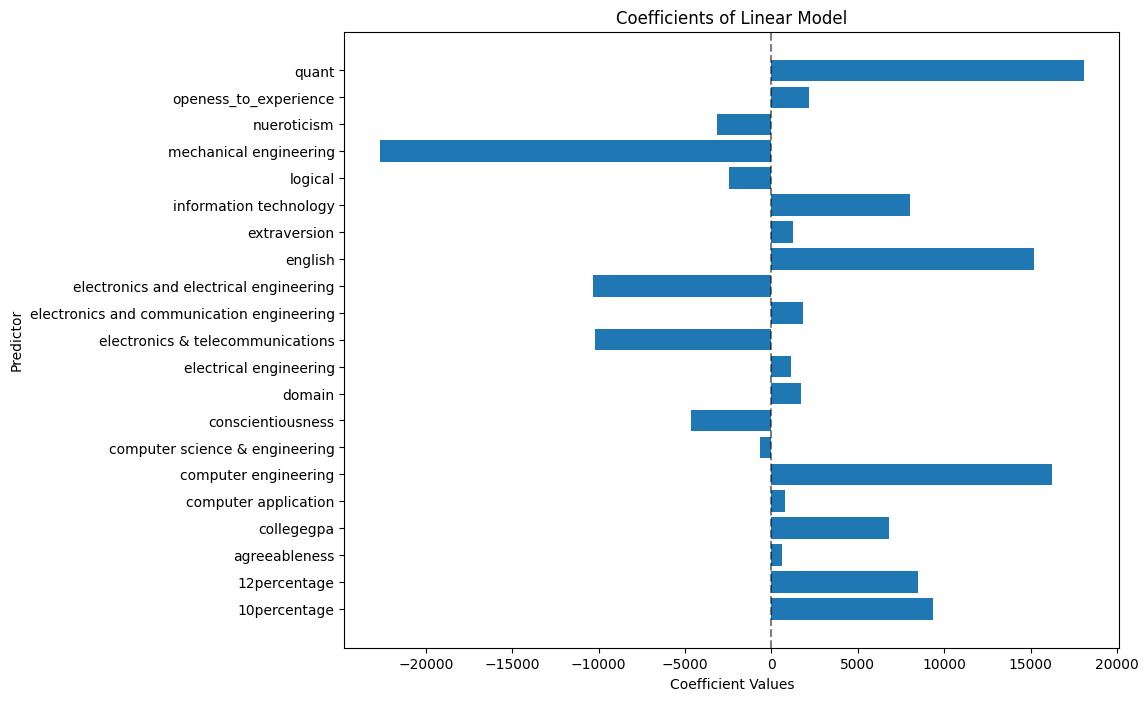

In [105]:
# Set up the figure size
plt.figure(figsize=(10,8))

# Sort column names alphabetically
sorted_columns = sorted(X_test.columns)

# Coefficient values from our fitted model (the intercept not included)
coefs = lin_reg.coef_

# Sort coefficients based on the alphabetical order of column names
sorted_coefs = [coef for _, coef in sorted(zip(X_test.columns, coefs))]

# Create the horizontal barplot
plt.barh(sorted_columns, sorted_coefs)

plt.yticks(ticks=range(len(sorted_columns)) , labels= sorted_columns)

# Dotted, black vertical line at zero
plt.axvline(0, c='k', ls='--', alpha=0.5)


plt.yticks(ticks=range(len(sorted_columns)), labels=sorted_columns)


# Label axes
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
plt.title('Coefficients of Linear Model')


plt.show()



These coefficients can give an intuition of how each feature impacts expected salary:


*   Computer Engineering earn on average higher than other engineering specialization
*   Mechanical engineering earn less on average compared to other engineering specialization



In [106]:
#Illustration of model performance vs perfect prediction

# Graphic depiction of model's performance on Training dataset

perfect_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

combined_chart = (pred_chart_test + perfect_test).properties(
    title='Performance on Training dataset'
)

combined_chart

alt.LayerChart(...)

In [107]:
# Graphic depiction of model's performance on Validation dataset

perfect_test = alt.Chart(pd.DataFrame({'target': y_val, 'preds': y_val})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_val, 'preds': y_valid_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

combined_chart = (pred_chart_test + perfect_test).properties(
    title='Performance on Validation dataset'
)

combined_chart

alt.LayerChart(...)

In [108]:
# Graphic depiction of model's performance on Testing dataset

perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

combined_chart = (pred_chart_test + perfect_test).properties(
    title='Performance on Testing dataset'
)

combined_chart

alt.LayerChart(...)

The model seem to struggle predicting salary below 50,000 and above 400,000

###KNN Model:


In [131]:
from sklearn.neighbors import KNeighborsRegressor

In [424]:
knn_default_reg = KNeighborsRegressor(n_neighbors=43, metric='manhattan')
knn_default_reg.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=43)

In [425]:
# Training performance
y_train_preds = knn_default_reg.predict(X_train)


y_train_rmse = round(mse(y_train, y_train_preds, squared=False), 2)


model_train_perf = (y_train_rmse)

print(model_train_perf)

78978.86


In [426]:
# Validation performance
y_valid_preds = knn_default_reg.predict(X_val)
y_valid_rmse = round(mse(y_val, y_valid_preds, squared=False), 2)


model_valid_perf = (y_valid_rmse)

print(model_valid_perf)

78618.33


In [427]:
# Testing performance
y_test_preds = knn_default_reg.predict(X_test)

y_test_rmse = round(mse(y_test, y_test_preds, squared=False), 2)


model_test_perf = (y_test_rmse)

print(model_test_perf)

82689.79


In [213]:
# Model performance:
print("Baseline performance: " + str(model_base_perf))
print("Training performance: " + str(model_train_perf))
print("Validation performance: " + str(model_valid_perf))
print("Test performance: " + str(model_test_perf))

Baseline performance: 87798.91
Training performance: 78978.86
Validation performance: 78618.33
Test performance: 82689.79


In [214]:
# Graphic depiction of model's performance on Training dataset

perfect_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

combined_chart = (pred_chart_test + perfect_test).properties(
    title='Performance on Training dataset'
)

combined_chart

alt.LayerChart(...)

In [215]:
# Graphic depiction of model's performance on Validation dataset

perfect_test = alt.Chart(pd.DataFrame({'target': y_val, 'preds': y_val})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_val, 'preds': y_valid_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

combined_chart = (pred_chart_test + perfect_test).properties(
    title='Performance on Validation dataset'
)

combined_chart

alt.LayerChart(...)

In [216]:
# Graphic depiction of model's performance on Testing dataset

perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

combined_chart = (pred_chart_test + perfect_test).properties(
    title='Performance on Testing dataset'
)

combined_chart

alt.LayerChart(...)



*   KNN-neighbor performs slightly worse than the linear model. From the illustrations above it seems to have trouble re-adjusting its prediction from neighbor data point. This is likely due to the relatively high dimensional space (21 features) also known as "the curse of high dimensionalty". As the number of features (dimensions) increases, the volume of the space grows exponentially. This leads to data sparsity and makes it challenging to find "nearest neighbors" since points are relatively far apart in high-dimensional spaces




###Random Forest:

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [407]:
#Random Forest model with default parameters
rf_model = RandomForestRegressor(max_depth= 5, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 10, n_estimators= 50)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=50)

In [408]:
# Training performance
y2_train_preds = rf_model.predict(X_train)

y2_train_rmse = round(mse(y_train, y2_train_preds, squared=False), 2)


rf_train_perf = (y2_train_rmse)

print(rf_train_perf)

73586.51


In [409]:
# Validaton performance
y2_val_preds = rf_model.predict(X_val)

y2_val_rmse = round(mse(y_val, y2_val_preds, squared=False), 2)


rf_val_perf = (y2_val_rmse)

print(rf_val_perf)

78718.85


In [410]:
# Test performance
y2_test_preds = rf_model.predict(X_test)

y2_test_rmse = round(mse(y_test, y2_test_preds, squared=False), 2)


rf_test_perf = (y2_test_rmse)

print(rf_test_perf)


82327.82


In [391]:
# Analyze Feature Importance

feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train.columns,
        'feature_importance': rf_model.feature_importances_
     }
)

In [392]:
feat_imp_rf_df

,feature,feature_importance
0,10percentage,0.179884
1,12percentage,0.166252
2,collegegpa,0.040947
3,english,0.188580
4,logical,0.052936
5,quant,0.269068
6,domain,0.024579
7,conscientiousness,0.003587
8,agreeableness,0.013531
9,extraversion,0.004353


In [393]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [394]:
# Graph Feature Importance

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

### GridSearch to find best parameters

In [395]:
from sklearn.model_selection import GridSearchCV

In [398]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 7],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters found:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=50, random_state=42)

In [401]:
# Now we can evaluate the model performance
y_pred_val = best_rf_model.predict(X_val)
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)


In [402]:
#Training RMSE:
y_train_rmse = round(mse(y_train, y_pred_train, squared=False), 2)

rf_train_perf = (y_train_rmse)

print(rf_train_perf)

73519.48


In [400]:
#Validation RMSE
y_val_rmse = round(mse(y_val, y_pred_val, squared=False), 2)

rf_val_perf = (y_val_rmse)

print(rf_val_perf)

78693.58


In [403]:
# Testing RMSE:
y_test_rmse = round(mse(y_test, y_pred_test, squared=False), 2)

rf_test_perf = (y_test_rmse)

print(rf_test_perf)

82175.69
